## Just using GIT to generate Captions

In [86]:
import numpy as np
from transformers import AutoProcessor, AutoModelForCausalLM
from PIL import Image
import os
from os.path import join as opj
import tqdm
import torch

In [87]:
subj="CSI4"
base_dir=f"/home/matteo/storage/brain_tuning/{subj}"

In [88]:

y_train=np.load(opj(base_dir,f"img_train.npy"),allow_pickle=True)
y_test=np.load(opj(base_dir,f"img_test.npy"),allow_pickle=True)
y_val=np.load(opj(base_dir,f"img_val.npy"),allow_pickle=True)

In [89]:
processor = AutoProcessor.from_pretrained("microsoft/git-base-coco")
model = AutoModelForCausalLM.from_pretrained("microsoft/git-base-coco")

In [90]:
device="cuda:1"
model.to(device)

GitForCausalLM(
  (git): GitModel(
    (embeddings): GitEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(1024, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (image_encoder): GitVisionModel(
      (vision_model): GitVisionTransformer(
        (embeddings): GitVisionEmbeddings(
          (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16), bias=False)
          (position_embedding): Embedding(197, 768)
        )
        (pre_layrnorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (encoder): GitVisionEncoder(
          (layers): ModuleList(
            (0-11): 12 x GitVisionEncoderLayer(
              (self_attn): GitVisionAttention(
                (k_proj): Linear(in_features=768, out_features=768, bias=True)
                (v_proj): Linear(in_features=768, out_features=768, bias=True)
             

In [91]:
batch=128
train_captions=[]
with torch.no_grad():
    for i in tqdm.trange(len(y_train)//batch+1):

        images=y_train[i*batch:(i+1)*batch].tolist()
        pixel_values = processor(images=images, return_tensors="pt").pixel_values.to(device)
        generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
        generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)
        train_captions+=generated_caption



100%|██████████| 18/18 [03:12<00:00, 10.69s/it]


a large passenger jet flying over a city.


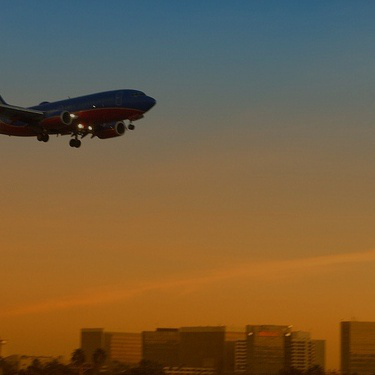

In [92]:
print(generated_caption[0])
images[0]


In [93]:
batch=128
test_captions=[]
with torch.no_grad():
    for i in tqdm.trange(len(y_test)//batch+1):

        images=y_test[i*batch:(i+1)*batch].tolist()
        pixel_values = processor(images=images, return_tensors="pt").pixel_values.to(device)
        generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
        generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)
        test_captions+=generated_caption


100%|██████████| 4/4 [00:38<00:00,  9.71s/it]


In [94]:
batch=128
val_captions=[]
with torch.no_grad():
    for i in tqdm.trange(len(y_val)//batch+1):

        images=y_val[i*batch:(i+1)*batch].tolist()
        pixel_values = processor(images=images, return_tensors="pt").pixel_values.to(device)
        generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
        generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)
        val_captions+=generated_caption


100%|██████████| 4/4 [00:37<00:00,  9.33s/it]


In [95]:
np.save(opj(base_dir,f"train_captions.npy"),np.array(train_captions))
np.save(opj(base_dir,f"test_captions.npy"),np.array(test_captions))
np.save(opj(base_dir,f"val_captions.npy"),np.array(val_captions))


In [96]:
print(f"End of {subj}")

End of CSI4
